FFR 120  
Felix Waldschock

HW 3 
Exercise 12.4
## Average path length and clustering coef ficient of Watts–Strogatz small-world graphs. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


In [3]:
# generate adjacency matrix
def generateWattStrogatz(n,p,c):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1
        # do the nearest neighbour connections
        for b in range(c):
            # c describes how many connections in total, so we need to divide by 2 to get the number of connections per side
            A[i,(i+int(b/2)+1)%n] = 1
            A[(i+int(b/2)+1)%n,i] = 1

    return A

# theoretical approximation for C for Watts Strogatz Networks

$ C = \frac{3(c-2)}{4(c-1)}$

In [4]:
# compute the average path length of matrix A
def computePathMatrix(A):
    n = A.shape[0]

    # copy A
    A_copy = np.copy(A)

    # compute the shortest path length between all pairs of nodes
    # initialize matrix with -1
    L = np.ones((n,n)) * (-1)

    # implement a copy of L where the diagonal is =-1 so that the while case can just check that none of the elements are -1
    B = np.copy(L)
    # B set diagonal to 0
    np.fill_diagonal(B, 0)

    # set increment t
    t = 1
    t_max = 200

 

    while (np.any(B == -1)):
    #for b in range(5):
        for i in range(n):
            for j in range(i,n):
                if A[i,j] != 0:
                    if L[i,j] == L[j,i]:
                        if L[i,j] == -1:
                            #if i != j:
                                # if i != j, set L[i,j] = t+1
                                L[i,j] = t
                                L[j,i] = t
                                #print("Changed L[{},{}] to {}".format(i,j,t))
        # increase power of A
        A = np.matmul(A,A_copy)
        # Update counter t
        t += 1
        
        # Update B
        B = np.copy(L)
        np.fill_diagonal(B, 0)


        # if t > 10, break
        # if t > t_max:
        #     print("Breaking, t > 200")
        #     break
    # print("Finished after T = {}".format(t))
    return L

In [5]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # # increase the text size
    # plt.rcParams.update({'font.size': 20})

    # # label the nodes
    # for i in range(n):
    #     ax.text(x[i], y[i], str(i), color='white', ha='center', va='center')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')


    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')


In [6]:
# Formula 12.3
def getClusteringCoefficient(A):
    A_2 = np.matmul(A,A)
    A_3 = np.matmul(A_2,A)
    # get the diagonal
    diag = np.diagonal(A_3)
    # get the sum of the diagonal
    sumDiag = np.sum(diag)              # Dimension: (1,1)

    # k_i is the degree of node i 
    k_i = np.sum(A, axis=0)             # Dimension: (n,1)
    # elementwise square of k_i
    k_i_2 = np.square(k_i)              # Dimension: (n,1)
    # sum of k_i_2
    sum_Triples = np.sum(k_i_2 - k_i)   # Dimension: (1,1)

    # get the number of nodes
    n = A.shape[0]

    # compute the clustering coefficient
    C = sumDiag / sum_Triples

    return C

In [7]:
# compute the average path length
def getAveragePathLength(L):
    # sum the matrix L and divide by the number of elements minus the diagonal
    n = L.shape[0]
    # set the diagonal to 0
    np.fill_diagonal(L, 0)
    sum = np.sum(L)
    avg = sum / (n*n - n)
    return avg
    

In [8]:
def getClusteringCoefficientTheoretical(c):
    return (3*(c-2)/(4*(c-1)))

In [13]:
# parameters
n = 500
c = 6
p = np.logspace(-6, 0, 20)


In [14]:
# init the arrays to store network
A_ = np.zeros((n,n, len(p)))
L_ = np.zeros((n,n, len(p)))
C = np.zeros(len(p))

# Init the network and evaluate L and C
for i in trange(len(p)):
    A_[:,:,i] = generateWattStrogatz(n, p[i], c)
    L_[:,:,i] = computePathMatrix(A_[:,:,i])
    C[i] = getClusteringCoefficient(A_[:,:,i])

# compute the average path length for each p
avg_path_length = np.zeros(len(p))

for i in trange(len(p)):
    avg_path_length[i] = getAveragePathLength(L_[:,:,i])

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 1261.12it/s]


In [11]:
if(0):
    # compute for the clustering plot
    n_1 = 50
    n_2 = 1000
    p_0 = 0
    # parameter c for the clustering coefficient, even numbers from 2 to 100 log spaced
    #cs = np.linspace(1,,40, dtype=int)*4
    # for n_1, create a cs array with even numbers from 2 to 100 log spaced
    cs_1 = np.array([2,4,6,8,10,20,30,40,50,60,70,80,90,100])

    # for n_2, add to the cs_1, in 40 steps, 100 to 800
    cs_2 = np.arange(start=100, stop=1100, step=60, dtype=int)

    # combine the two arrays
    cs_2 = np.concatenate((cs_1,cs_2))

    # print
    print(cs_1)
    print(cs_2)

    # init the arrays to store network
    A_1 = np.zeros((n_1,n_1, len(cs_1)))
    L_1 = np.zeros((n_1,n_1, len(cs_1)))
    C_1 = np.zeros(len(cs_1))

    A_2 = np.zeros((n_2,n_2, len(cs_2)))
    L_2 = np.zeros((n_2,n_2, len(cs_2)))
    C_2 = np.zeros(len(cs_2))

    # Init the network and evaluate L and C
    for i in trange(len(cs_1)):
        A_1[:,:,i] = generateWattStrogatz(n_1, p_0, cs_1[i])
        L_1[:,:,i] = computePathMatrix(A_1[:,:,i])
        C_1[i] = getClusteringCoefficient(A_1[:,:,i])

    for i in trange(len(cs_2)):
        A_2[:,:,i] = generateWattStrogatz(n_2, p_0, cs_2[i])
        L_2[:,:,i] = computePathMatrix(A_2[:,:,i])
        C_2[i] = getClusteringCoefficient(A_2[:,:,i])


NameError: name 'cs_1' is not defined

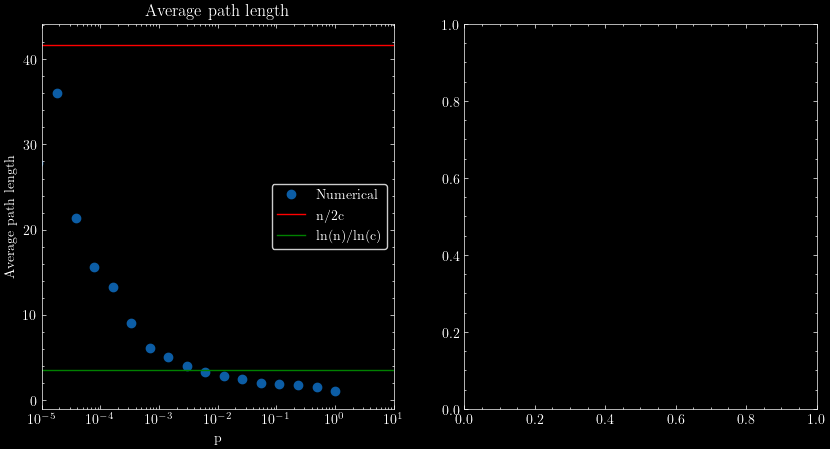

In [15]:
# plot the data in a 1x2 subplot
# left average length, right clustering coefficient

fig, ax = plt.subplots(1,2, figsize=(10,5))

# clear the plots
ax[0].cla()
ax[1].cla()

# plot the numerical
ax[0].semilogx(p, avg_path_length, 'o', label="Numerical")
ax[0].set_xlabel("p")
ax[0].set_ylabel("Average path length")
ax[0].set_title("Average path length")
ax[0].set_xlim(10e-6, 10e0)

# plot the boundaries at n/2c (eq. 12.6) and ln(n)/ln(c) (eq. 12.7) -> draw horizontal lines
ax[0].axhline(n/(2*c), label="n/2c", color="red")
ax[0].axhline(np.log(n)/np.log(c), label="ln(n)/ln(c)", color="green")
ax[0].legend()

# plot the numerical coefficients on the right
ax[1].semilogx(cs_1, C_1[:], 'o', label="Numerical, n = {}".format(n_1))
ax[1].semilogx(cs_2, C_2[:], 'x', label="Numerical, n = {}".format(n_2))

# plot the theoretical coefficients on the right
ax[1].semilogx(cs_2, getClusteringCoefficientTheoretical(cs_2), '--r', label="Theoretical")

ax[1].set_xlabel("c")
ax[1].set_ylabel("Clustering coefficient")

# show legend
ax[1].legend()
